<a href="https://colab.research.google.com/github/RaquelMichelon/ExpensesClassifierMLProject/blob/main/firstMLPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prototype of the Project **Classification Model**

## #F00 - First ML pipeline

The data came from [Kaggle](Paste the link here)

### **Task 1 DATA PREPARATION - Knowing and Cleaning Data**

In [ ]:
#importing required packages
import pandas as pd
import numpy as np

In [ ]:
# load the bank data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bank.csv')

In [ ]:
# read the bank data directly
#df_bank = pd.read_csv('bank.csv')

In [ ]:
# presenting first 5 rows
df_bank.head(5)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',29-jun.-17,TRF FROM Indiaforensic SERVICES,NaN,29-jun.-17,NaN,"1.000.000,00","1.000.000,00",.
1,409000611074',5-jul.-17,TRF FROM Indiaforensic SERVICES,NaN,5-jul.-17,NaN,"1.000.000,00","2.000.000,00",.
2,409000611074',18-jul.-17,FDRL/INTERNAL FUND TRANSFE,NaN,18-jul.-17,NaN,"500.000,00","2.500.000,00",.
3,409000611074',1-ago.-17,TRF FRM Indiaforensic SERVICES,NaN,1-ago.-17,NaN,"3.000.000,00","5.500.000,00",.
4,409000611074',16-ago.-17,FDRL/INTERNAL FUND TRANSFE,NaN,16-ago.-17,NaN,"500.000,00","6.000.000,00",.


In [ ]:
# presenting last 5 rows
df_bank.tail(5)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
116196,409000362497',5-mar.-19,TRF TO 1196428 Indiaforensic SE,NaN,5-mar.-19,"117.934,30",NaN,"-1.901.902.092,61",.
116197,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,NaN,5-mar.-19,NaN,"300.000,00","-1.901.602.092,61",.
116198,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,NaN,5-mar.-19,NaN,"300.000,00","-1.901.302.092,61",.
116199,409000362497',5-mar.-19,IMPS 05-03-20194C,NaN,5-mar.-19,"109.868,65",NaN,"-1.901.411.961,26",.
116200,409000362497',5-mar.-19,Sweep Trf To: 40900036427,NaN,5-mar.-19,"5.000,00",NaN,"-1.901.416.961,26",.


In [ ]:
# For further analysis it is necessary to study the general characteristics of the fields
df_bank.info()

In [ ]:
# To get a list of Account No
df_bank['Account No'].unique()

array(["409000611074'", "409000493201'", "409000425051'", "409000405747'",
       "409000438611'", "409000493210'", "409000438620'", "1196711'",
       "1196428'", "409000362497'"], dtype=object)

In [ ]:
# check data shape (rows, columns)
print("Data Frame Shape", df_bank.shape)

Data Frame Shape (116201, 9)


---

* The dataframe has 116.201 rows and 9 columns

---

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Account No           116201 non-null  object 
 1   DATE                 116201 non-null  object 
 2   TRANSACTION DETAILS  113702 non-null  object 
 3   CHQ.NO.              905 non-null     float64
 4   VALUE DATE           116201 non-null  object 
 5    WITHDRAWAL AMT      53549 non-null   object 
 6    DEPOSIT AMT         62652 non-null   object 
 7   BALANCE AMT          116201 non-null  object 
 8   .                    116201 non-null  object 
dtypes: float64(1), object(8)
memory usage: 8.0+ MB


In [ ]:
# print column names
print("Column names: ", df_bank.columns.values)

Column names:  ['Account No' 'DATE' 'TRANSACTION DETAILS' 'CHQ.NO.' 'VALUE DATE'
 ' WITHDRAWAL AMT ' ' DEPOSIT AMT ' 'BALANCE AMT' '.']


In [ ]:
#check null values for each column (Columns with 0 are complete)
df_bank.isna().sum()

Account No                  0
DATE                        0
TRANSACTION DETAILS      2499
CHQ.NO.                115296
VALUE DATE                  0
 WITHDRAWAL AMT         62652
 DEPOSIT AMT            53549
BALANCE AMT                 0
.                           0
dtype: int64

In [ ]:
#check null values for all Data Frame
df_bank.isna().sum().sum()

233996

In [ ]:
#There are 4 variables with missing values: Transaction Details, CHQ. NO., Withdrawal AMT and Balance AMT, but we can not consider those last two 
#Let's check if the sum of Withdrawal with Deposit are equal to the total rows 
df_count = df_bank.isna().sum()
df_count.iloc[5] + df_count.iloc[6]

116201

In [ ]:
# to show all non numerical data
df_bank.select_dtypes(exclude=['number'])

,Account No,DATE,TRANSACTION DETAILS,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',29-jun.-17,TRF FROM Indiaforensic SERVICES,29-jun.-17,NaN,"1.000.000,00","1.000.000,00",.
1,409000611074',5-jul.-17,TRF FROM Indiaforensic SERVICES,5-jul.-17,NaN,"1.000.000,00","2.000.000,00",.
2,409000611074',18-jul.-17,FDRL/INTERNAL FUND TRANSFE,18-jul.-17,NaN,"500.000,00","2.500.000,00",.
3,409000611074',1-ago.-17,TRF FRM Indiaforensic SERVICES,1-ago.-17,NaN,"3.000.000,00","5.500.000,00",.
4,409000611074',16-ago.-17,FDRL/INTERNAL FUND TRANSFE,16-ago.-17,NaN,"500.000,00","6.000.000,00",.
...,...,...,...,...,...,...,...,...
116196,409000362497',5-mar.-19,TRF TO 1196428 Indiaforensic SE,5-mar.-19,"117.934,30",NaN,"-1.901.902.092,61",.
116197,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,5-mar.-19,NaN,"300.000,00","-1.901.602.092,61",.
116198,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,5-mar.-19,NaN,"300.000,00","-1.901.302.092,61",.
116199,409000362497',5-mar.-19,IMPS 05-03-20194C,5-mar.-19,"109.868,65",NaN,"-1.901.411.961,26",.


In [ ]:
# to show the types of data in each column
df_bank.dtypes

Account No              object
DATE                    object
TRANSACTION DETAILS     object
CHQ.NO.                float64
VALUE DATE              object
 WITHDRAWAL AMT         object
 DEPOSIT AMT            object
BALANCE AMT             object
.                       object
dtype: object

In [ ]:
# to show the types of data in a specific column
df_bank['BALANCE AMT'].dtypes

dtype('O')

In [ ]:
#all data are objects, so we will parse each them to specific data type

# all data in BALANCE AMT column will be parse to float
df_bank['BALANCE AMT'] = df_bank['BALANCE AMT'].apply(lambda value: float(value.strip().replace(".", "").replace(",", "."))) #pd.to_numeric(df_bank['BALANCE AMT'], downcast='float')
# to show the types of data in a specific column
df_bank['BALANCE AMT'].dtypes


dtype('float64')

In [ ]:
# all data in WITHDRAWAL AMT column will be parse to float
df_bank[' WITHDRAWAL AMT '] = df_bank[' WITHDRAWAL AMT '].apply(lambda value: float(value.strip().replace(".", "").replace(",", ".")) if isinstance(value, str) else value)
df_bank[' WITHDRAWAL AMT '].dtypes

dtype('float64')

In [ ]:
# all data in WITHDRAWAL AMT column will be parse to float
df_bank[' DEPOSIT AMT '] = df_bank[' DEPOSIT AMT '].apply(lambda value: float(value.strip().replace(".", "").replace(",", ".")) if isinstance(value, str) else value)

df_bank[' DEPOSIT AMT '].dtypes

dtype('float64')

In [ ]:
# to show all mumeric data 
df_bank._get_numeric_data()

,CHQ.NO.,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
0,NaN,NaN,1000000.0,1.000000e+06
1,NaN,NaN,1000000.0,2.000000e+06
2,NaN,NaN,500000.0,2.500000e+06
3,NaN,NaN,3000000.0,5.500000e+06
4,NaN,NaN,500000.0,6.000000e+06
...,...,...,...,...
116196,NaN,117934.30,NaN,-1.901902e+09
116197,NaN,NaN,300000.0,-1.901602e+09
116198,NaN,NaN,300000.0,-1.901302e+09
116199,NaN,109868.65,NaN,-1.901412e+09


In [ ]:
# cheking number of categories for TRANSACTION DETAILS COLUMN
len(df_bank['TRANSACTION DETAILS'].unique())

44807

In [ ]:
# FILLING MISSING DATA AS A NEW CATEGORY CALLED Unknown

# function to imput new value
def input_category(data_frame,col_name):
  data_frame[col_name] = np.where(data_frame[col_name].isnull(), "Unknown", data_frame[col_name])

In [ ]:
# calling function to fill missing data
input_category(df_bank, 'TRANSACTION DETAILS')
input_category(df_bank, 'CHQ.NO.')

In [ ]:
df_bank.isna().sum()

Account No                 0
DATE                       0
TRANSACTION DETAILS        0
CHQ.NO.                    0
VALUE DATE                 0
 WITHDRAWAL AMT        62652
 DEPOSIT AMT           53549
BALANCE AMT                0
.                          0
dtype: int64

In [ ]:
# FILLING MISSING DATA AS int zero

# function to imput value zero
def input_category(data_frame,col_name):
  data_frame[col_name] = np.where(data_frame[col_name].isnull(), 0, data_frame[col_name])

# calling function to fill missing data
input_category(df_bank, ' WITHDRAWAL AMT ')
input_category(df_bank, ' DEPOSIT AMT ')


# other option to imput zero value to missing data is:
#df_bank[[' WITHDRAWAL AMT ', ' DEPOSIT AMT ']] = df_bank[[' WITHDRAWAL AMT ', ' DEPOSIT AMT ']].fillna(value=0)

In [ ]:
df_bank.isna().sum()

Account No             0
DATE                   0
TRANSACTION DETAILS    0
CHQ.NO.                0
VALUE DATE             0
 WITHDRAWAL AMT        0
 DEPOSIT AMT           0
BALANCE AMT            0
.                      0
dtype: int64

In [ ]:
# identifying columns type
df_bank.dtypes

Account No              object
DATE                    object
TRANSACTION DETAILS     object
CHQ.NO.                 object
VALUE DATE              object
 WITHDRAWAL AMT        float64
 DEPOSIT AMT           float64
BALANCE AMT            float64
.                       object
dtype: object

In [ ]:
# to show mumeric data 
df_bank._get_numeric_data()


,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
0,0.00,1000000.0,1.000000e+06
1,0.00,1000000.0,2.000000e+06
2,0.00,500000.0,2.500000e+06
3,0.00,3000000.0,5.500000e+06
4,0.00,500000.0,6.000000e+06
...,...,...,...
116196,117934.30,0.0,-1.901902e+09
116197,0.00,300000.0,-1.901602e+09
116198,0.00,300000.0,-1.901302e+09
116199,109868.65,0.0,-1.901412e+09


In [ ]:
# to show all NON NUMERICAL data
df_bank.select_dtypes(exclude=['number'])

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,.
0,409000611074',29-jun.-17,TRF FROM Indiaforensic SERVICES,Unknown,29-jun.-17,.
1,409000611074',5-jul.-17,TRF FROM Indiaforensic SERVICES,Unknown,5-jul.-17,.
2,409000611074',18-jul.-17,FDRL/INTERNAL FUND TRANSFE,Unknown,18-jul.-17,.
3,409000611074',1-ago.-17,TRF FRM Indiaforensic SERVICES,Unknown,1-ago.-17,.
4,409000611074',16-ago.-17,FDRL/INTERNAL FUND TRANSFE,Unknown,16-ago.-17,.
...,...,...,...,...,...,...
116196,409000362497',5-mar.-19,TRF TO 1196428 Indiaforensic SE,Unknown,5-mar.-19,.
116197,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,Unknown,5-mar.-19,.
116198,409000362497',5-mar.-19,FDRL/INTERNAL FUND TRANSFE,Unknown,5-mar.-19,.
116199,409000362497',5-mar.-19,IMPS 05-03-20194C,Unknown,5-mar.-19,.


In [ ]:
# Finding Duplicate Data
duplicate_rows_df = df_bank[df_bank.duplicated()]
print(duplicate_rows_df)

      Account No        DATE               TRANSACTION DETAILS  CHQ.NO.  \
27296   1196711'  17-jul.-15         INTERNAL FUND TRANSFER IN  Unknown   
27514   1196711'  25-jul.-15         INTERNAL FUND TRANSFER IN  Unknown   
27515   1196711'  25-jul.-15         INTERNAL FUND TRANSFER IN  Unknown   
27516   1196711'  25-jul.-15         INTERNAL FUND TRANSFER IN  Unknown   
27517   1196711'  25-jul.-15         INTERNAL FUND TRANSFER IN  Unknown   
27842   1196711'   6-ago.-15         INTERNAL FUND TRANSFER IN  Unknown   
28170   1196711'  14-ago.-15         INTERNAL FUND TRANSFER IN  Unknown   
28801   1196711'   5-set.-15         INTERNAL FUND TRANSFER IN  Unknown   
28802   1196711'   5-set.-15         INTERNAL FUND TRANSFER IN  Unknown   
28803   1196711'   5-set.-15         INTERNAL FUND TRANSFER IN  Unknown   
29581   1196711'  30-set.-15         INTERNAL FUND TRANSFER IN  Unknown   
29833   1196711'  12-out.-15  TRF TO  Indiaforensic SERVICES I  Unknown   
31976   1196711'   4-jan.

In [ ]:
# Binning Data creating another column with pandas.cut()

#label_transaction = ['withdrawall', 'deposit']
#category = []
#df_bank['transaction_labels'] = pd.cut(df_bank[' WITHDRAWAL AMT	'], labels=label_transaction, bins=category, include_lowest=False)

In [ ]:
#Encode the categorical variables

#import category_encoders as ce

#create an object of OneHotEncoder
#OHE = ce.OneHotEncoder(cols=[])

### **Task 2 - EDA (Exploratory Data Analysis)**

In [ ]:
#show some basic statistical details

df_bank.describe()

,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
count,1.162010e+05,1.162010e+05,1.162010e+05
mean,2.068757e+06,2.052394e+06,-1.404852e+09
std,7.696881e+06,6.652164e+06,5.348202e+08
min,0.000000e+00,0.000000e+00,-2.045201e+09
25%,0.000000e+00,0.000000e+00,-1.690383e+09
50%,0.000000e+00,5.000000e+03,-1.661395e+09
75%,2.682500e+04,5.000000e+05,-1.236888e+09
max,4.594475e+08,5.448000e+08,8.500000e+06


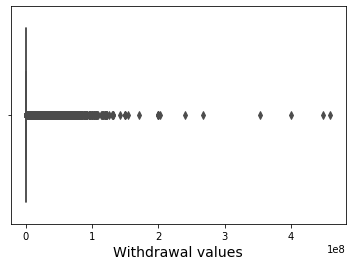

In [ ]:
# Detecting Outliers with Seaborn Box Plot to withdrawal values
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(x=df_bank[' WITHDRAWAL AMT '], color='lime')
plt.xlabel('Withdrawal values', fontsize=14)
plt.show()

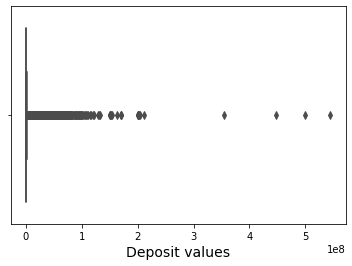

In [ ]:
# Detecting Outliers with Seaborn Box Plot to withdrawal values

sns.boxplot(x=df_bank[' DEPOSIT AMT '], color='lime')
plt.xlabel('Deposit values', fontsize=14)
plt.show()

In [ ]:
# Detecting Outliers with Z-Score
from scipy import stats

#Creating a new data-frame excluding all the ‘object’ types column
df_bank_num = df_bank.select_dtypes(exclude=['object'])

#Selecting elements from each column that lie within 3 units of Z score
df_bank_zscore = df_bank_num[(np.abs(stats.zscore(df_bank_num))<3).all(axis=1)]

df_bank_zscore_withdrawal = df_bank_num[(np.abs(stats.zscore(df_bank_num[[' WITHDRAWAL AMT ']]))<=3).all(axis=1)]
type(df_bank_zscore_withdrawal)

# https://towardsdatascience.com/simplify-your-dataset-cleaning-with-pandas-75951b23568e
# https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
# https://github.com/GDhasade/Medium.com_Contents/blob/master/Handle_Categorical_Missing_Data.ipynb


pandas.core.frame.DataFrame

#### Data labeling

### **Task 3 - Statistical Analysis**

### **Task 4 - Data Visualization**